# Inference_and_Testing

#### Using Tips data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.stats.multicomp as mc

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Data is clean hence no cleaning required

df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.shape

(244, 7)

In [7]:
# Created a new column called percentage to summarize the tip per bill. 
# This would help in my analysis.

df['percentage'] = (df['tip'] / df['total_bill']) * 100

In [8]:
df

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


### To run my statistical analysis

#### T_stat and P_Stat

##### Hypothesis 
Null Hypothesis:
• Female tips are not more than male tips 

Alternate Hypothesis:
• Female tips are more than male tips

In [9]:
# Groupby female per percentage

female = df[df['sex'] == 'Female']['percentage']

print(female)

0       5.944673
4      14.680765
11     14.180374
14     20.364127
16     16.166505
         ...    
226    19.821606
229    13.019892
238    13.033771
240     7.358352
243    15.974441
Name: percentage, Length: 87, dtype: float64


In [10]:
# Groupby male per percentage

male = df[df['sex'] == 'Male']['percentage']

print(male)

1      16.054159
2      16.658734
3      13.978041
5      18.623962
6      22.805017
         ...    
236     7.936508
237     3.563814
239    20.392697
241     8.822232
242     9.820426
Name: percentage, Length: 157, dtype: float64


In [11]:
df.groupby('sex')['percentage'].mean()

sex
Male      15.765055
Female    16.649074
Name: percentage, dtype: float64

In [12]:
# Running the t_stat and p_val

t_stat, p_val = stats.ttest_ind(female, male)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# the higher t-test value suggests that females tip more than males as 
# shown above by the mean percentage tip by gender.

T-statistic: 1.0833972270478005
P-value: 0.2797103849605485


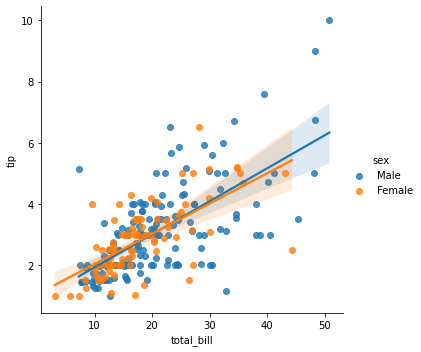

In [13]:
sns.lmplot(data = df, x='total_bill', y='tip', hue = 'sex')


In this case, the p-value is 0.2797103849605485. This p-value represents the probability of observing a test statistic as extreme as the one calculated if the null hypothesis is true.

Since the p-value (0.2797103849605485) is greater than the significance level p>0.5, there isnt strong  evidence to reject the null hypothesis.

Therefore null hypothesis is accepeted. ie there is not enough evidence to conclude that female tips are more than male tips.

#### Repeat the same for smokers and non smokers

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Hypothesis 
Null Hypothesis:
• Smokers tips are not more than non smoker tips 

Alternate Hypothesis:
• Smoker tips are more than non smoker tips

In [15]:
smoker = df[df['smoker'] == 'Yes']['percentage']
print(smoker)

56      7.892660
58     15.658363
60     15.820601
61     14.482259
62     17.967332
         ...    
234    19.317450
236     7.936508
237     3.563814
240     7.358352
241     8.822232
Name: percentage, Length: 93, dtype: float64


In [16]:
non_smoker = df[df['smoker'] == 'No']['percentage']
print(non_smoker)

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
235    12.413108
238    13.033771
239    20.392697
242     9.820426
243    15.974441
Name: percentage, Length: 151, dtype: float64


In [17]:
df.groupby('smoker')['percentage'].mean()

smoker
Yes    16.319604
No     15.932846
Name: percentage, dtype: float64

In [18]:
t_stat, p_val = stats.ttest_ind(smoker,non_smoker)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.4796693002669833
P-value: 0.6318957776878545


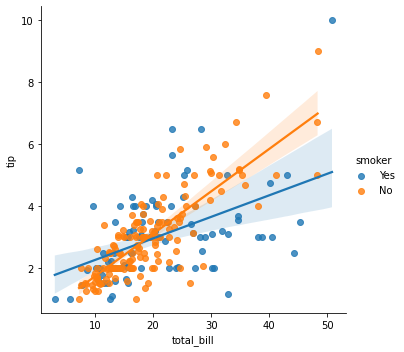

In [19]:
sns.lmplot(data = df, x='total_bill', y='tip', hue = 'smoker')

In this case, the p-value is 0.6318957776878545. 

Since the p-value (0.6318957776878545) is greater than the significance level p> 0.05, there isnt enough evidence to reject the null hypothesis.

Therefore the null hypothesis is accepeted. 

#### Chi-test


The chi-square test was used to examine the association between categorical variables in the dataset.

I want to test whether there is an association between the variables 'sex' (male or female) and 'smoker' (yes or no). ie independence of smokers differs between males and females.

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [21]:
# Create a contingency table
contingency_table = pd.crosstab(df['smoker'], df['sex'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 0.0
P-value: 1.0


The chi-squared value of 0.0 and a p-value of 1.0 show that there is no significant association both.

There is no difference between the observed and expected frequencies in the contingency table, which means that the variables are independent of each other. Additionally, the p-value shows that the observed association between the variables is due to chance alone and is not statistically significant. In other words, being a smoker or non-smoker does not appear to be related to the gender of the individuals in terms of tipping behavior.

#### Anova

ANOVA is used to analyze the variation between multiple groups. I performed an ANOVA test on the 'total_bill' variable based on the 'time' categories. ie compare the 'total_bill' between the 'Lunch' and 'Dinner' time categories. 

In [22]:
# Perform the ANOVA test
result = stats.f_oneway(df['total_bill'][df['time'] == 'Lunch'],
                        df['total_bill'][df['time'] == 'Dinner'],
                       )

# Print the test results
print("ANOVA test results:")
print(f"F-value: {result.statistic}")
print(f"P-value: {result.pvalue}")


ANOVA test results:
F-value: 8.396303207955595
P-value: 0.00410462140759571


The ANOVA test results show that there is a significant difference in the mean total bill between the time groups being compared. 

The F-value of 8.3963 shows that there is a relatively large difference between the means of the time groups compared to the variability within the groups.

The p-value of 0.0041, which is less than the significance level of p<0.05 shows that there is strong evidence to reject the null hypothesis, which assumes no significant difference between the group means.

In other words, the time category (e.g., 'Lunch' and 'Dinner') has a significant impact on the average total bill amount in the dataset.

For further analyses were conducted to identify which specific groups differ significantly from each other and to quantify the effect size of the observed differences. 

In [23]:
# Create a MultiComparison object with the data
mc_model = mc.MultiComparison(df['total_bill'], df['time'])

# Perform the Tukey HSD test
tukey_result = mc_model.tukeyhsd()

# Print the summary table
print(tukey_result.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Dinner  Lunch  -3.6285 0.0041 -6.0951 -1.1618   True
----------------------------------------------------


The Tukey HSD test results show that there is a significant difference between the "Dinner" and "Lunch" groups in terms of the "total_bill" variable. The mean difference between these two groups is -3.6285. The confidence interval (lower, upper) for the mean difference is (-6.0951, -1.1618). The p-adj value represents the adjusted p-value after considering multiple comparisons.

The mean total bill for the "Dinner" group is significantly lower than that of the "Lunch" group.

The "reject" column indicates whether the null hypothesis of no significant difference is rejected or not. In this case, it is marked as "True," indicating that I reject the null hypothesis and conclude that there is a significant difference between the groups.

#### Pearson's correlation


To conduct Pearson's correlation using the tips dataset, I can use the corr function from pandas. Pearson's correlation coefficient measures the linear relationship between continuous variables, it is only applicable to numeric columns like 'total_bill' and 'tip'.The resulting correlation coefficient  ranges between -1 and 1, where -1 indicates a strong negative linear relationship, 0 indicates no linear relationship, and 1 indicates a strong positive linear relationship.

In [24]:
# Calculate Pearson's correlation coefficient
corr = df['total_bill'].corr(df['tip'])

print(f"Pearson's correlation coefficient: {corr}")

Pearson's correlation coefficient: 0.6757341092113641


The Pearson's correlation coefficient between 'total_bill' and 'tip' in the tips dataset is approximately 0.676.

This positive correlation coefficient shows a moderately strong positive linear relationship between the total bill amount and the tip amount. It indicates that as the total bill increases, the tip amount tends to increase as well. 

### Conclusion to the tips dataset

##### Business Implication

Based on the results obtained from the analysis above, the following business implications and strategies can be considered by the restaurant to increase tips and income from customers:

- Gender (Male and Female):

There is no significant difference in tip amounts between males and females. Therefore, the restaurant can focus on providing excellent service and creating a welcoming atmosphere that appeals to both male and female customers.

- Smoking Status (Smoker and Non-Smoker):

The analysis indicates no significant difference in tip amounts between smokers and non-smokers. Hence, the restaurant can maintain a consistent level of service quality for both smoker and non-smoker customers.

- Time of Day (Lunch vs. Dinner):

There is a significant difference in the average total bill amount between lunch and dinner. To increase tips and income during lunch hours, the restaurant can consider strategies such as offering lunch specials, promoting affordable options, and providing efficient service to cater to customers with limited time. For dinner service, the restaurant may focus on enhancing the dining experience, offering premium menu items, and providing exceptional service to encourage higher total bills and subsequently higher tips.

- Overall Service and Customer Experience:

Regardless of gender, smoking status, or time of day, the key to increasing tips and cash flow is to prioritize exceptional service and create a positive customer experience. This includes attentive and friendly staff, prompt service, ensuring food quality, and maintaining a pleasant ambiance.

- Pricing and Menu Strategies:

Analyzing the correlation between total bill and tip amount can provide insights into pricing and menu strategies. The restaurant can consider offering menu items at various price points to cater to different customer preferences. Additionally, highlighting value-for-money options and providing clear and transparent pricing can encourage customers to feel satisfied with their dining experience and be more inclined to leave higher tips.

- Staff Training and Incentives:

Investing in staff training programs to enhance service skills and customer interactions can positively impact tips and income. Empowering staff to provide personalized recommendations, upselling techniques, and creating a warm and memorable dining experience can lead to increased customer satisfaction and higher tips. Consider implementing an incentive program to reward exceptional service and motivate staff to go above and beyond.

# THE END